In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

Fetching data 

In [3]:
import requests
import io

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

response = requests.get(url)

if response.status_code == 200:
    content = response.content
    text = io.BytesIO(content)
    data = pd.read_csv(text)
else:
    print(f'Data not seen with error code {response.status_code}')


In [8]:
df= data.copy()
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [25]:
missing_values = df.isnull()
for x in missing_values.columns:
    m = missing_values[x].value_counts()
    print(f'{m}')

MODELYEAR
False    1067
Name: count, dtype: int64
MAKE
False    1067
Name: count, dtype: int64
MODEL
False    1067
Name: count, dtype: int64
VEHICLECLASS
False    1067
Name: count, dtype: int64
ENGINESIZE
False    1067
Name: count, dtype: int64
CYLINDERS
False    1067
Name: count, dtype: int64
TRANSMISSION
False    1067
Name: count, dtype: int64
FUELTYPE
False    1067
Name: count, dtype: int64
FUELCONSUMPTION_CITY
False    1067
Name: count, dtype: int64
FUELCONSUMPTION_HWY
False    1067
Name: count, dtype: int64
FUELCONSUMPTION_COMB
False    1067
Name: count, dtype: int64
FUELCONSUMPTION_COMB_MPG
False    1067
Name: count, dtype: int64
CO2EMISSIONS
False    1067
Name: count, dtype: int64


In [35]:
QD = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
corr = QD.corr()
corr

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.874154,0.819482,-0.808554
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.849685,0.776788,-0.770430
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.898039,0.995542,-0.935613
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.861748,0.985804,-0.893809
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,1.000000,0.892129,-0.906394
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,0.892129,1.000000,-0.927965
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.906394,-0.927965,1.000000


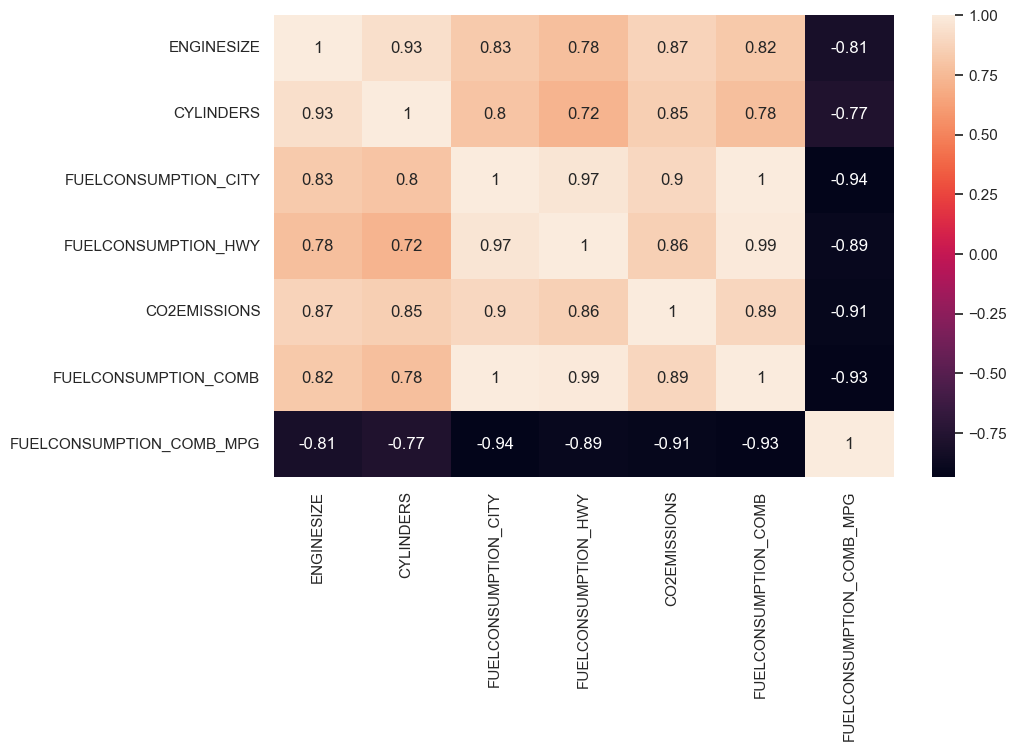

In [228]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot = True)
plt.savefig('heat map')
plt.show()

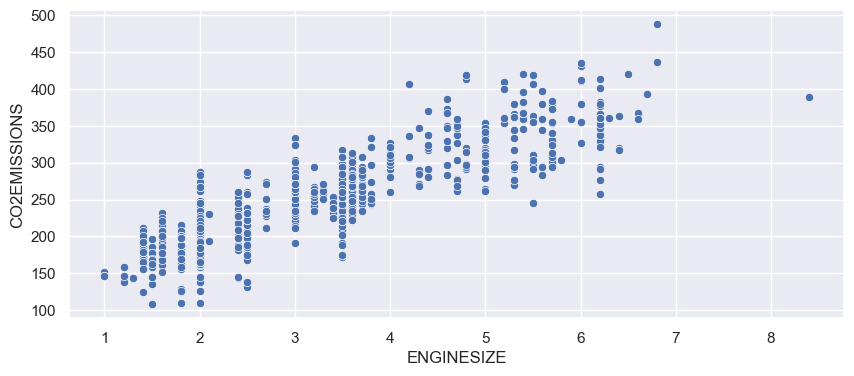

ENGINESIZE


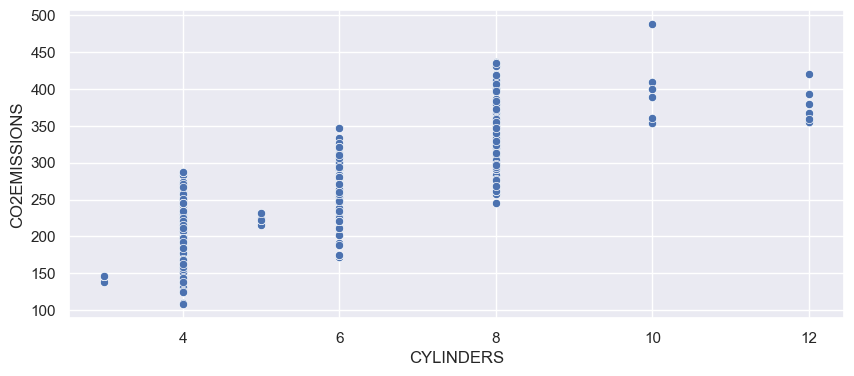

CYLINDERS


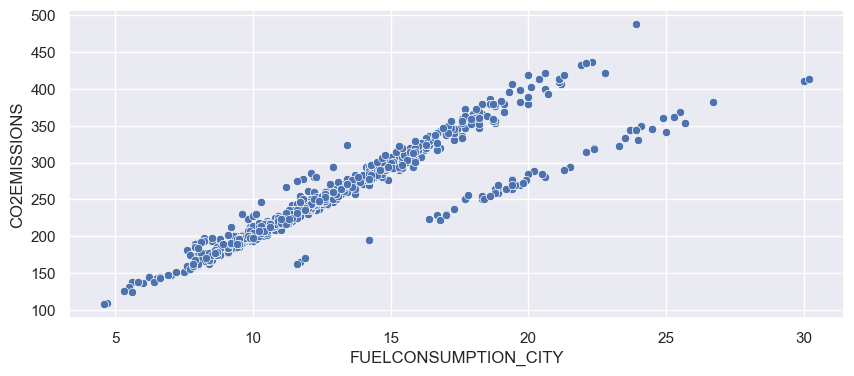

FUELCONSUMPTION_CITY


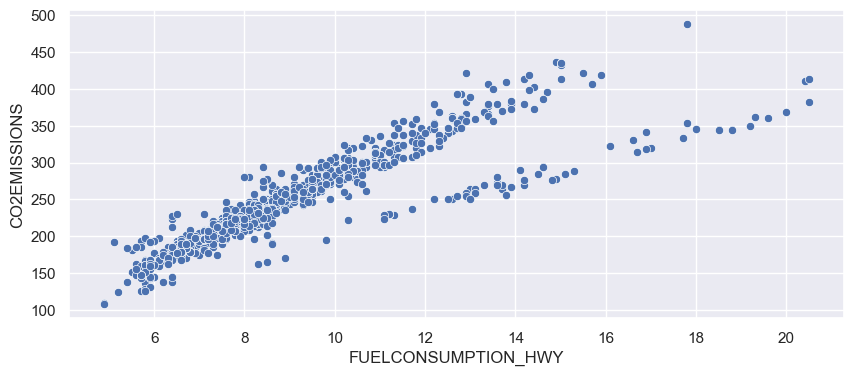

FUELCONSUMPTION_HWY


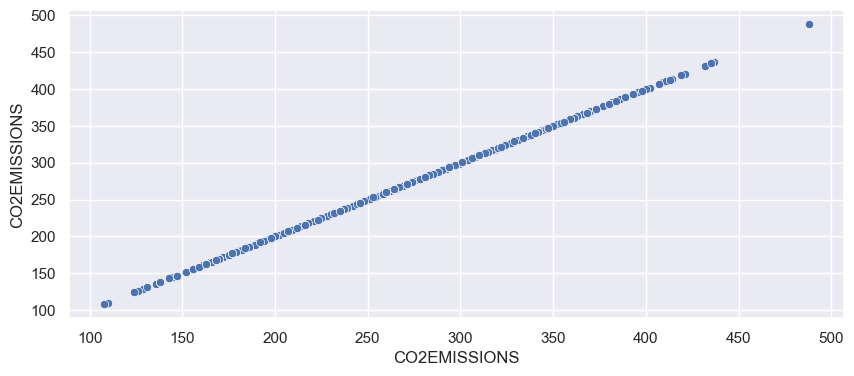

CO2EMISSIONS


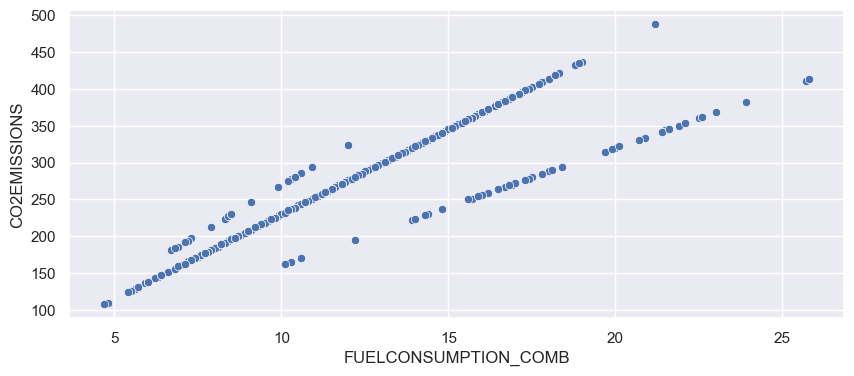

FUELCONSUMPTION_COMB


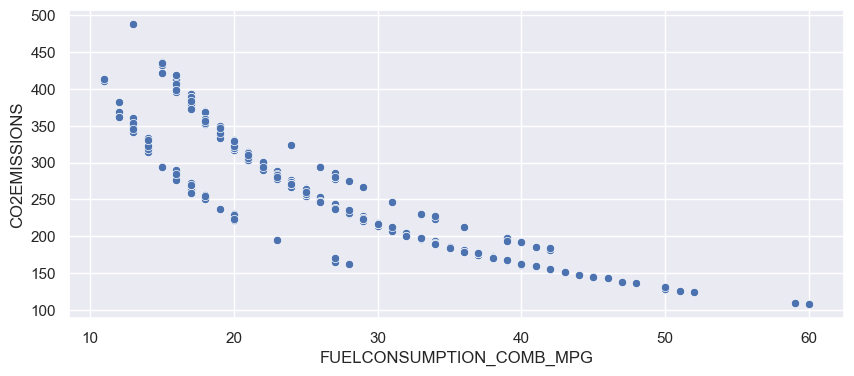

FUELCONSUMPTION_COMB_MPG


In [46]:
for x in QD.columns:
    plt.figure(figsize =(10,4))
    sns.scatterplot(x=x,y = df['CO2EMISSIONS'],data = QD)
    plt.title('')
    plt.show()
    print(x)

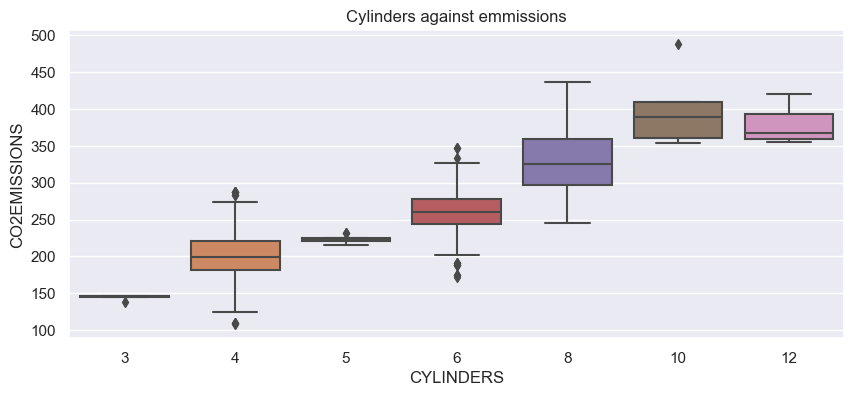

In [50]:
plt.figure(figsize =(10,4))
sns.boxplot(y = df['CO2EMISSIONS'],x = df['CYLINDERS'])
plt.title('Cylinders against emmissions')
plt.show()

## model building

In [122]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-2]
y = df.iloc[:,-2:]

x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=30,test_size = 0.2)

In [123]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train[['ENGINESIZE']],y_train[['CO2EMISSIONS']])

LinearRegression()

In [156]:
print(f'model coeficient: {model.coef_}')
print(f'model intercept: {model.intercept_}')
y_pred = model.predict(x_test[['ENGINESIZE']])
y_orig = y_test[['CO2EMISSIONS']]
print(f'model score: {model.score(y_pred,y_orig)}')
data= {'y_orig':y_orig,
       'y_pred':y_pred,
      }
# dataa = pd.DataFrame(data)

model coeficient: [[39.19200881]]
model intercept: [125.62722957]
model score: -25379.80857062033


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## multiple linear regression

In [161]:
features = x_train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]


In [162]:
multiple_model = LinearRegression()
multiple_model.fit(features,y_train['CO2EMISSIONS'])

LinearRegression()

In [163]:
y_pred = multiple_model.predict(x_test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])

In [164]:
y_pred

array([254.53503105, 215.86832877, 321.36899495, 183.30879812,
       368.99346964, 309.76140512, 256.16022846, 195.61338841,
       198.4185212 , 199.83098071, 348.87380576, 197.30854134,
       240.03332233, 257.50812269, 212.63100232, 239.11762177,
       246.75148444, 387.70756412, 306.13088552, 187.90708717,
       337.21992555, 203.47399671, 240.54778422, 313.85220278,
       329.05511021, 206.21589185, 318.03467346, 194.02851916,
       258.45014369, 339.74028161, 188.99074659, 348.87380576,
       225.48100951, 227.77243606, 271.03591607, 292.94478838,
       347.49883543, 277.96179322, 191.99536521, 308.81443021,
       205.32518408, 248.52561013, 325.65827015, 365.70291889,
       270.78644465, 286.56641143, 346.46275744, 252.2147328 ,
       254.99278949, 193.84001839, 192.23460723, 323.41672861,
       313.18647667, 209.92290115, 229.84232354, 217.93821625,
       186.50116184, 335.86474147, 221.72612955, 271.46365885,
       231.4167797 , 416.68074565, 253.59358203, 312.02

In [165]:
y_orig

,CO2EMISSIONS
879,246
10,225
387,343
1040,186
390,318
...,...
826,198
924,393
806,191
997,235


In [199]:
y_orig2 = y_orig[:,0]
y_orig2.shape

(214,)

In [202]:
data= {'y_orig':y_orig2,
       'y_pred':y_pred,
      }

In [203]:
dataa = pd.DataFrame(data)

In [206]:
dataa.head()

,y_orig,y_pred
0,246,254.535031
1,225,215.868329
2,343,321.368995
3,186,183.308798
4,318,368.993470


In [218]:
multiple_model.coef_

array([11.54186915,  6.79440528, -2.57516936, -4.83506894, 16.56724391])

In [219]:
multiple_model.intercept_

66.63718664507127

In [221]:
y_pred

array([254.53503105, 215.86832877, 321.36899495, 183.30879812,
       368.99346964, 309.76140512, 256.16022846, 195.61338841,
       198.4185212 , 199.83098071, 348.87380576, 197.30854134,
       240.03332233, 257.50812269, 212.63100232, 239.11762177,
       246.75148444, 387.70756412, 306.13088552, 187.90708717,
       337.21992555, 203.47399671, 240.54778422, 313.85220278,
       329.05511021, 206.21589185, 318.03467346, 194.02851916,
       258.45014369, 339.74028161, 188.99074659, 348.87380576,
       225.48100951, 227.77243606, 271.03591607, 292.94478838,
       347.49883543, 277.96179322, 191.99536521, 308.81443021,
       205.32518408, 248.52561013, 325.65827015, 365.70291889,
       270.78644465, 286.56641143, 346.46275744, 252.2147328 ,
       254.99278949, 193.84001839, 192.23460723, 323.41672861,
       313.18647667, 209.92290115, 229.84232354, 217.93821625,
       186.50116184, 335.86474147, 221.72612955, 271.46365885,
       231.4167797 , 416.68074565, 253.59358203, 312.02

/var/folders/rf/0c4ksmzx6yn0kmws1mrx8v980000gn/T/ipykernel_27467/1620260666.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['CO2EMISSIONS'], hist=False, color="r", label="Actual Value")
/var/folders/rf/0c4ksmzx6yn0kmws1mrx8v980000gn/T/ipykernel_27467/1620260666.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/

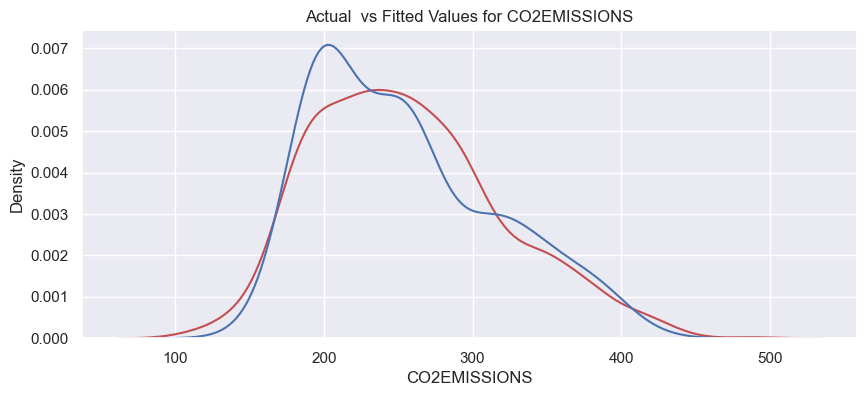

In [230]:
plt.figure(figsize=(10,4))
ax1 = sns.distplot(df['CO2EMISSIONS'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual  vs Fitted Values for CO2EMISSIONS')
plt.savefig('Predictions')
plt.show()
